In [84]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [86]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv("iris (1).csv");

print(df.head())
df 

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [53]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [87]:
df1 = df.drop(['Species'],axis=1) 

In [88]:
array=df1.values
array

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [89]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X 

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [90]:
dbscan = DBSCAN(eps=0.45, min_samples=5)
dbscan.fit(X)         

DBSCAN(algorithm='auto', eps=0.45, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [91]:
#Noisy samples are given the label -1.
dbscan.labels_ 

array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1, -1, -1, -1,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1,
        2,  2,  2, -1, -1, -1, -1, -1, -1, -1,  2, -1, -1, -1,  2, -1, -1,
       -1,  2, -1, -1, -1,  2, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1,  2, -1,  2,  2,  2, -1,  2,  2,  2, -1,  2, -1, -1],
      dtype=int64)

In [92]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster']) 

In [93]:
cl
pd.set_option("display.max_rows", None)

In [82]:
cl  

,cluster
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,-1
9,0


In [96]:
df1 = pd.concat([df,cl],axis=1) 
df1     

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
5,5.4,3.9,1.7,0.4,setosa,0
6,4.6,3.4,1.4,0.3,setosa,0
7,5.0,3.4,1.5,0.2,setosa,0
8,4.4,2.9,1.4,0.2,setosa,-1
9,4.9,3.1,1.5,0.1,setosa,0


In [106]:
import matplotlib.pyplot as plt
>>> plt.style.use('classic')

Text(0.5, 1.0, 'Clusters using DBScan')

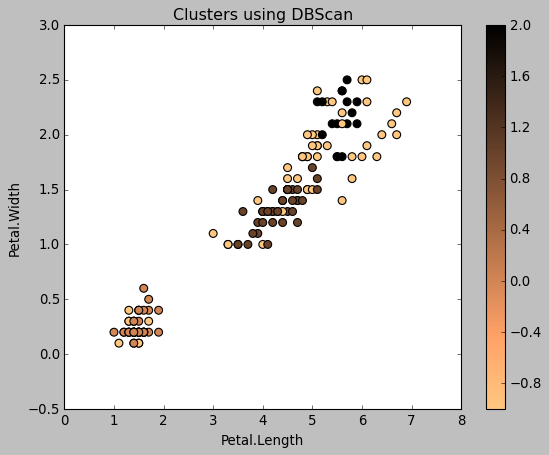

In [107]:
df1.plot(x="Petal.Length",y ="Petal.Width",c=dbscan.labels_ ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using DBScan')  

In [108]:
dl = dbscan.labels_ 

In [109]:
sklearn.metrics.silhouette_score(X, dl)

<IPython.core.display.Javascript object>

0.18059754653658136

In [111]:
from sklearn.cluster import KMeans
clf = KMeans(n_clusters=3)
y_kmeans = clf.fit_predict(X)  

In [114]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [117]:
cl1=pd.DataFrame(y_kmeans,columns=['Kcluster']) 
cl1 

,Kcluster
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [118]:
df2 = pd.concat([df1,cl1],axis=1) 
df2 

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,cluster,Kcluster
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0
5,5.4,3.9,1.7,0.4,setosa,0,0
6,4.6,3.4,1.4,0.3,setosa,0,0
7,5.0,3.4,1.5,0.2,setosa,0,0
8,4.4,2.9,1.4,0.2,setosa,-1,0
9,4.9,3.1,1.5,0.1,setosa,0,0


Text(0.5, 1.0, 'Clusters using KMeans')

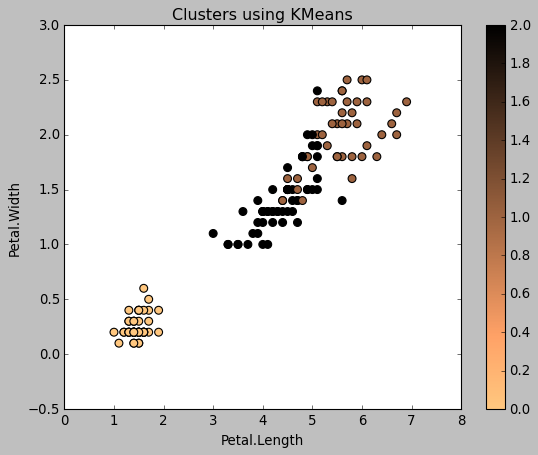

In [122]:
df2.plot(x="Petal.Length",y ="Petal.Width",c=y_kmeans ,kind="scatter",s=50 ,cmap=plt.cm.copper_r) 
plt.title('Clusters using KMeans')   

In [121]:
sklearn.metrics.silhouette_score(X, y_kmeans)

<IPython.core.display.Javascript object>

0.45994823920518646